In [1]:
# Data manipulation & visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for clean output
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the transfer plate CSV file
transfer_df = pd.read_csv('/kaggle/input/dig-4-bio-raman-transfer-learning-challenge/transfer_plate.csv')

# Display the first few rows
transfer_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 2043,Unnamed: 2044,Unnamed: 2045,Unnamed: 2046,Unnamed: 2047,Unnamed: 2048,Analyte concentration,Glucose (g/L),Sodium Acetate (g/L),Magnesium Acetate (g/L)
0,sample1,[6293,7095,8325,9934,11917,14394,18925,34874,65535,...,1616,1024,1013,1067,1277,5618],sample1,4.619282,1.937172,1.052928
1,NaN,[6505,7332,8482,10175,12132,14792,19594,35813,65535,...,1655,1004,1032,1049,1271,5756],sample2,5.782718,1.175902,1.214738
2,sample2,[6478,7158,8444,9979,11932,14503,19309,35118,65535,...,1651,1024,1009,1049,1275,5685],sample3,3.953448,1.350473,2.132459
3,NaN,[6511,7308,8520,10205,12260,14777,19569,35825,65535,...,1623,1021,1008,1026,1250,5839],sample4,2.038084,0.948045,1.380240
4,sample3,[6561,7342,8562,10166,12202,14838,19593,35869,65535,...,1638,1010,1012,1047,1307,5801],sample5,4.978295,0.459765,2.539622


In [3]:
# Select the relevant target columns
target_cols = ['Glucose (g/L)', 'Sodium Acetate (g/L)', 'Magnesium Acetate (g/L)']
targets = transfer_df[target_cols]

# Check for any missing values
print("Missing values per column:")
print(targets.isnull().sum())

Missing values per column:
Glucose (g/L)              96
Sodium Acetate (g/L)       96
Magnesium Acetate (g/L)    96
dtype: int64


In [4]:
# Calculate the mean value for each compound
means = targets.mean()

# Display the results
print(" Mean Concentration Values:")
print(means)

 Mean Concentration Values:
Glucose (g/L)              6.874632
Sodium Acetate (g/L)       1.172905
Magnesium Acetate (g/L)    1.578632
dtype: float64


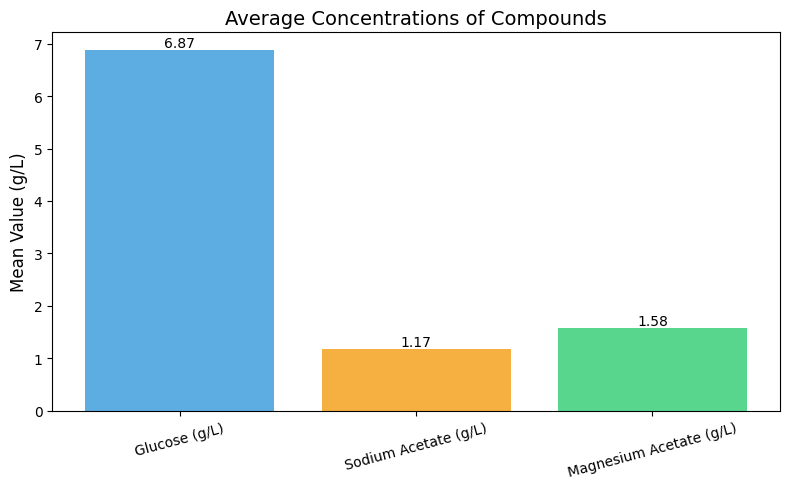

In [5]:
# Create a bar plot of the mean values
plt.figure(figsize=(8, 5))
bar_colors = ['#5DADE2', '#F5B041', '#58D68D']

bars = plt.bar(means.index, means.values, color=bar_colors)

# Add labels and annotations
plt.title('Average Concentrations of Compounds', fontsize=14)
plt.ylabel('Mean Value (g/L)', fontsize=12)
plt.xticks(rotation=15)

# Annotate each bar with the value
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [6]:
# Load the sample submission file
submission = pd.read_csv('/kaggle/input/dig-4-bio-raman-transfer-learning-challenge/sample_submission.csv')

# Preview before filling
submission.head()

,ID,Glucose,Sodium Acetate,Magnesium Sulfate
0,1,NaN,NaN,NaN
1,2,NaN,NaN,NaN
2,3,NaN,NaN,NaN
3,4,NaN,NaN,NaN
4,5,NaN,NaN,NaN


In [7]:
# Use the mean values for all rows in the submission
submission['Glucose'] = means['Glucose (g/L)']
submission['Sodium Acetate'] = means['Sodium Acetate (g/L)']
submission['Magnesium Sulfate'] = means['Magnesium Acetate (g/L)']  # Assumes acetate → sulfate match

# Preview the updated submission
submission.head()

,ID,Glucose,Sodium Acetate,Magnesium Sulfate
0,1,6.874632,1.172905,1.578632
1,2,6.874632,1.172905,1.578632
2,3,6.874632,1.172905,1.578632
3,4,6.874632,1.172905,1.578632
4,5,6.874632,1.172905,1.578632


In [8]:
# Export the DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

# Final confirmation
print(" Submission file 'submission.csv' has been saved successfully!")

 Submission file 'submission.csv' has been saved successfully!
